# 11. Edge Detection

In [1]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ip= input("Enter image file name: ")

Enter image file name: Images/Polygon.png


In [3]:
img= cv2.imread(ip, 0)
# img= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img.shape
# img= cv2.imread(ip, 0)

(460, 819)

In [4]:
def padding(arr):
    new_arr= arr.copy()
    new_arr[0, :]= arr[1, :]
    new_arr[-1, :]= arr[-2, :]
    new_arr[:, 0]= arr[:, 1]
    new_arr[:, -1]= arr[:, -2]
    return new_arr

In [5]:
def prewitt_op(img):
    new_img_x= np.zeros(img.shape)
    new_img_y= np.zeros(img.shape)
    new_img= np.zeros(img.shape)
    dir_gradient= np.zeros(img.shape)
    filter_x=  np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    filter_y=  filter_x.T
    
    for i in range(filter_x.shape[0]//2, new_img.shape[0]-filter_x.shape[0]//2):
        for j in range(filter_x.shape[1]//2, new_img.shape[1]-filter_x.shape[1]//2):
            
            x1= i-filter_x.shape[0]//2
            x2= x1+ filter_x.shape[0]
            y1= j- filter_x.shape[1]//2
            y2= y1+ filter_x.shape[1]
            arr0= img[ x1:x2 , y1:y2]
            along_x= np.dot(np.ravel(arr0), np.ravel(filter_x).T)
            along_y= np.dot(np.ravel(arr0), np.ravel(filter_y).T)
            new_img_x[i][j]= abs(along_x)
            new_img_y[i][j]= abs(along_y)
            new_img[i][j]= new_img_x[i][j] + new_img_y[i][j]
            dir_gradient[i][j]= np.arctan(along_y/along_x)+ (np.pi/2)
            dir_gradient[i][j]*= (180/np.pi)
    new_img_x= padding(new_img_x)
    new_img_y= padding(new_img_y)
    new_img= padding(new_img)
    dir_gradient= padding(dir_gradient)
    return np.array(new_img_x, dtype= 'uint8'), np.array(new_img_y, dtype= 'uint8'), \
            np.array(new_img, dtype= 'uint8'), np.array(dir_gradient)

In [6]:
def sobel_op(img):
    new_img_x= np.zeros(img.shape)
    new_img_y= np.zeros(img.shape)
    new_img= np.zeros(img.shape)
    dir_gradient= np.zeros(img.shape)
    filter_x=  np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filter_y=  filter_x.T
    
    for i in range(filter_x.shape[0]//2, new_img.shape[0]-filter_x.shape[0]//2):
        for j in range(filter_x.shape[1]//2, new_img.shape[1]-filter_x.shape[1]//2):
            
            x1= i-filter_x.shape[0]//2
            x2= x1+ filter_x.shape[0]
            y1= j- filter_x.shape[1]//2
            y2= y1+ filter_x.shape[1]
            arr0= img[ x1:x2 , y1:y2]
            along_x= np.dot(np.ravel(arr0), np.ravel(filter_x).T)
            along_y= np.dot(np.ravel(arr0), np.ravel(filter_y).T)
            new_img_x[i][j]= abs(along_x)
            new_img_y[i][j]= abs(along_y)
            new_img[i][j]= new_img_x[i][j] + new_img_y[i][j]
            dir_gradient[i][j]= np.arctan(along_y/along_x)+ (np.pi/2)
            dir_gradient[i][j]*= (180/np.pi)
    new_img_x= padding(new_img_x)
    new_img_y= padding(new_img_y)
    new_img= padding(new_img)
    dir_gradient= padding(dir_gradient)
    return np.array(new_img_x, dtype= 'uint8'), np.array(new_img_y, dtype= 'uint8'), \
            np.array(new_img, dtype= 'uint8'), np.array(dir_gradient)

In [7]:
new_img_x, new_img_y, new_img, dir_gradient= prewitt_op(img)
m= np.max(new_img)
threshold_img= new_img.copy()
threshold_img[new_img> m*0.33]= 1
threshold_img[new_img< m*0.33]= 0

In [8]:
new_img_xs, new_img_ys, new_imgs, dir_gradient_s= sobel_op(img)
m= np.max(new_imgs)
threshold_imgs= new_imgs.copy()
threshold_imgs[new_imgs> m*0.33]= 1
threshold_imgs[new_imgs< m*0.33]= 0

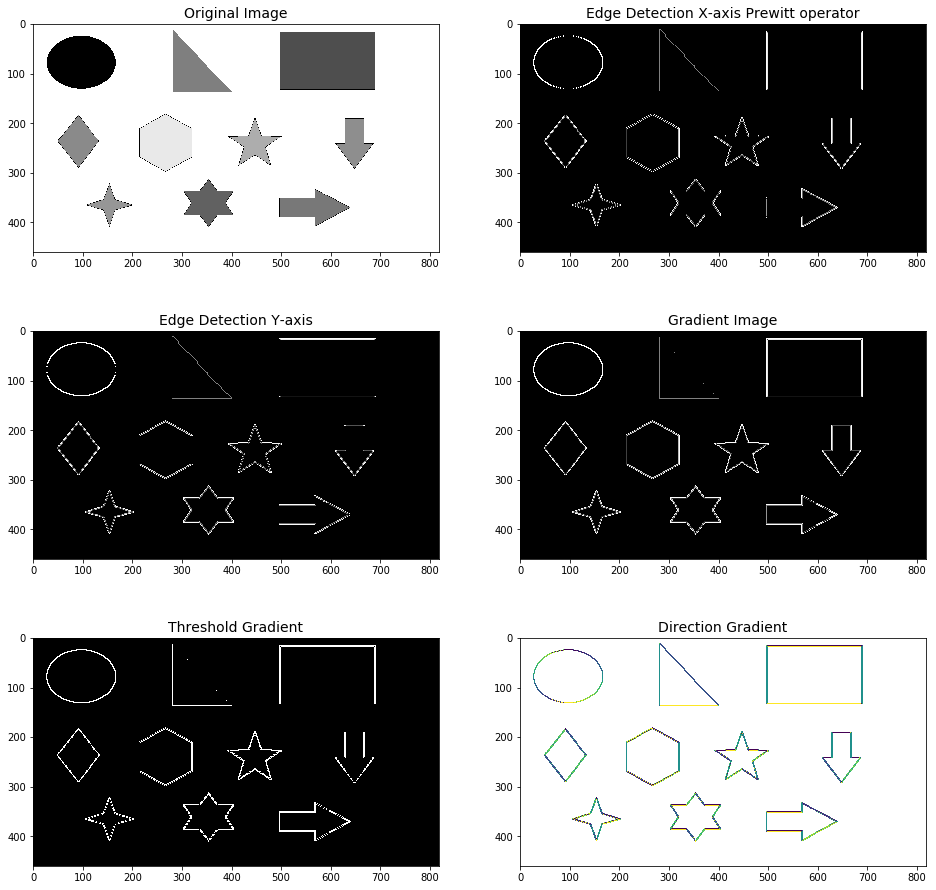

In [9]:
fig, ax= plt.subplots(ncols= 2, nrows= 3, figsize= (16, 16))
fsize= 14

ax[0, 0].set_title("Original Image", fontsize= fsize)
ax[0, 0].imshow(img, cmap= 'gray')

ax[0, 1].set_title("Edge Detection X-axis Prewitt operator", fontsize= fsize)
ax[0, 1].imshow(new_img_x, cmap= 'gray')


ax[1, 0].set_title("Edge Detection Y-axis", fontsize= fsize)
ax[1, 0].imshow(new_img_y, cmap= 'gray')

ax[1, 1].set_title("Gradient Image", fontsize= fsize)
ax[1, 1].imshow(new_img, cmap= 'gray')

ax[2, 0].set_title("Threshold Gradient", fontsize= fsize)
ax[2, 0].imshow(threshold_img, cmap= 'gray')

ax[2, 1].set_title("Direction Gradient", fontsize= fsize)
ax[2, 1].imshow(dir_gradient)

plt.show()

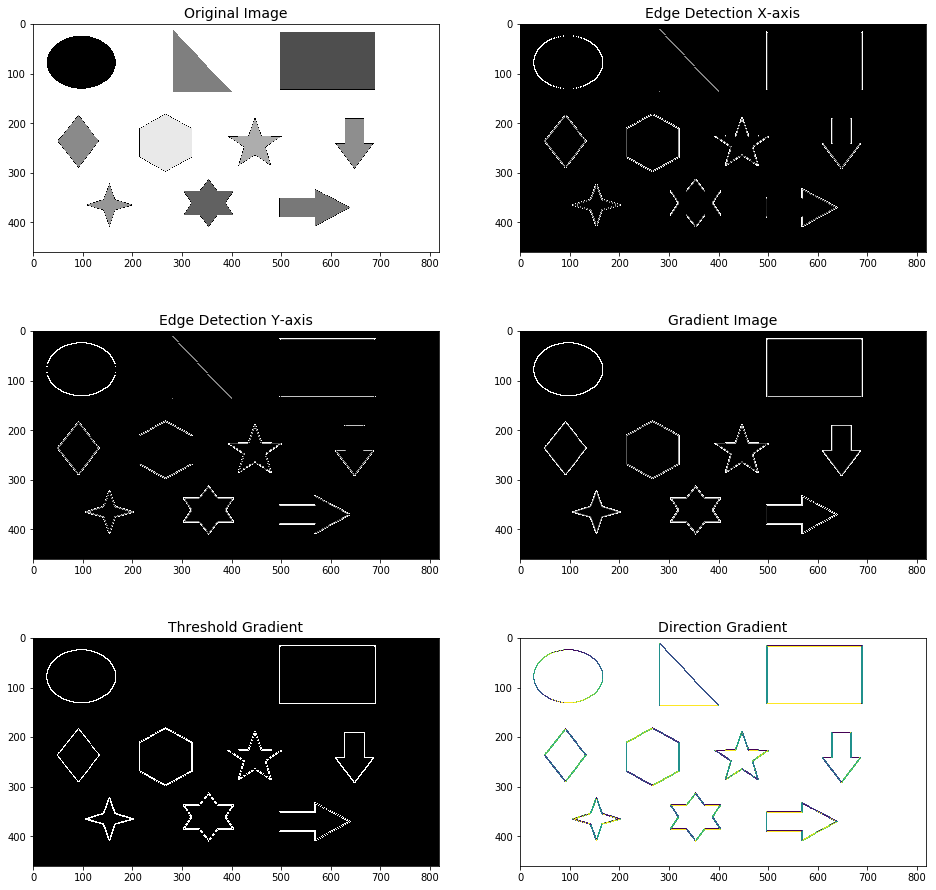

In [10]:
fig, ax= plt.subplots(ncols= 2, nrows= 3, figsize= (16, 16))
fsize= 14

ax[0, 0].set_title("Original Image", fontsize= fsize)
ax[0, 0].imshow(img, cmap= 'gray')

ax[0, 1].set_title("Edge Detection X-axis", fontsize= fsize)
ax[0, 1].imshow(new_img_xs, cmap= 'gray')


ax[1, 0].set_title("Edge Detection Y-axis", fontsize= fsize)
ax[1, 0].imshow(new_img_ys, cmap= 'gray')

ax[1, 1].set_title("Gradient Image", fontsize= fsize)
ax[1, 1].imshow(new_imgs, cmap= 'gray')

ax[2, 0].set_title("Threshold Gradient", fontsize= fsize)
ax[2, 0].imshow(threshold_imgs, cmap= 'gray')

ax[2, 1].set_title("Direction Gradient", fontsize= fsize)
ax[2, 1].imshow(dir_gradient_s)

plt.show()